# [RGA] Data Extraction and Time Conversion
Data management for Residual Gas Analysis (RGA)

This Python script allows you to extract specific columns from a .txt file, convert a datetime column into elapsed time in seconds, preview key measurements, and export the selected data to a .csv file.

---

## 🚀 Features
Read structured data from .txt files

Select and extract specific columns

Convert datetime to elapsed time (in seconds)

Generate a quick preview of selected measurements

Export cleaned data to .csv

## 🧰 Dependencies

pandas, numpy, matplotlib, datetime

---
Navid MOUHAMAD, RGA Data treatment. Available at: https://github.com/Nav9110/RGA_data_management


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
#import seaborn as sns

In [38]:
# Chemin du répertoire + nom du fichier
chemin = r'C:\Users\...\Test_Oxy_Sas20250408080842.txt'

# Skip les lignes de début, la ligne de fin, la colonne de fin, délimite les colonnes
df = pd.read_csv(chemin,  header = 0, skiprows = 58, skipfooter = 1, usecols = lambda column: column != "Unnamed: 103", delimiter='\t', engine='python')

# Conversion en datetime
df['Time'] = pd.to_datetime(df['Time'], format='%d/%m/%Y %H:%M:%S')
df.insert(loc=1, column='Time (s)', value=(df['Time'] - df['Time'].iloc[0]).dt.total_seconds())
df.head(3)

,Time,Time (s),Scan,Mass 1,Mass 2,Mass 3,Mass 4,Mass 5,Mass 6,Mass 7,...,Mass 92,Mass 93,Mass 94,Mass 95,Mass 96,Mass 97,Mass 98,Mass 99,Mass 100,Sum Scanned Masses
0,2025-04-08 08:08:41,0.0,1,0.000001,0.000004,0.000002,3.736300e-06,0.000001,2.831600e-06,9.865400e-07,...,0.000002,0.000002,0.000002,1.400400e-06,0.000002,0.000002,0.000002,1.619700e-06,0.000002,0.000202
1,2025-04-08 08:08:43,2.0,2,0.000001,0.000003,0.000003,1.119300e-06,0.000001,1.177400e-06,2.141500e-06,...,0.000002,0.000001,0.000002,7.553200e-07,0.000002,0.000001,0.000002,4.992000e-07,0.000002,0.000194
2,2025-04-08 08:08:45,4.0,3,0.000002,0.000002,0.000004,5.359600e-07,0.000002,8.003800e-07,2.096400e-06,...,0.000003,0.000001,0.000002,1.574700e-06,0.000002,0.000002,0.000002,1.307900e-06,0.000001,0.000195


C:\Users\navid.mouhamad\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


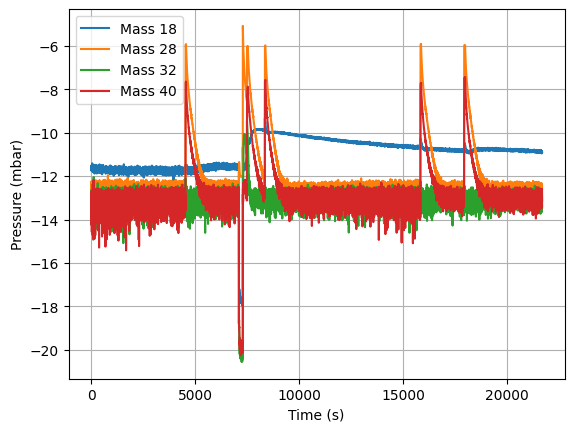

In [40]:
# Liste de masse que l'on souhaite voir
liste = ['Mass 18', 'Mass 28', 'Mass 32', 'Mass 40'] # A définir : 'Mass X', ...

# Pour tout voir dans le meme graph
for col in liste:
    plt.plot(df['Time (s)'], np.log(df[col]), label = col)

# Voir un à un 
#plt.plot(df['Time (s)'], np.log(df['Sum Scanned Masses']), label = 'Mass total')
#plt.plot(df['Time (s)'], (df['Mass 18']), label = 'Mass 18')

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Pressure (mbar)")
plt.grid()
#plt.xlim(7000,9000)
plt.show()

In [41]:
# Sauvegarde dans un dataframe "RGA_treated"
RGA_treated = pd.DataFrame()

# Liste de colonne à sauvegarder dans le fichier .csv 
liste2 = ['Time (s)', 'Mass 18', 'Mass 28', 'Mass 32','Mass 40','Sum Scanned Masses'] # A définir

for i in liste2:
    RGA_treated[i] = df[i]   

# Conversion en csv (dans le dossier ou se situe le code)
RGA_treated.to_csv('RGA_treated.csv', index=False)
RGA_treated.head(5)

,Time (s),Mass 18,Mass 28,Mass 32,Mass 40,Sum Scanned Masses
0,0.0,0.000009,0.000004,0.000002,1.226100e-06,0.000202
1,2.0,0.000009,0.000002,0.000002,6.592800e-07,0.000194
2,4.0,0.000008,0.000004,0.000001,1.649400e-06,0.000195
3,7.0,0.000009,0.000004,0.000003,2.539900e-06,0.000197
4,9.0,0.000010,0.000004,0.000003,2.458100e-06,0.000200
